VGGNet19

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential

2023-04-25 11:29:39.522878: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    #print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    #print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    #print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    #print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    #print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Documents/Group_1"


#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)



In [15]:
trainInp.shape

(250, 224, 224, 3)

In [ ]:
trainOut

In [16]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input

In [8]:
from keras.applications.vgg19 import VGG19

In [9]:
trainInp=x = preprocess_input(trainInp)

In [17]:
vgg19=VGG19(weights="imagenet")
for layer in vgg19.layers:
    layer.trainable = False
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
#x = Flatten()(vgg19.output)
#l1 = Dense(4096, activation='sigmoidal')(x)
#l2 = Dense(4096, activation='sigmoidal')(l1)
x = vgg19.get_layer('fc2').output
#x = GlobalAveragePooling2D()(x)
#l1 = Dense(4096, activation='relu')(x)
#l2 = Dense(4096, activation='relu')(l1)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=2,verbose=1)

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 100, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

Epoch 1/100
8/8 [==============================] - 25s 3s/step - loss: 0.6765 - accuracy: 0.7760 - val_loss: 0.0833 - val_accuracy: 0.9800
Epoch 2/100
8/8 [==============================] - 24s 3s/step - loss: 0.0185 - accuracy: 0.9960 - val_loss: 0.0761 - val_accuracy: 0.9800
Epoch 3/100
8/8 [==============================] - 25s 3s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0714 - val_accuracy: 0.9800
Epoch 4/100
8/8 [==============================] - 25s 3s/step - loss: 7.0125e-04 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9800
Epoch 5/100
8/8 [==============================] - 25s 3s/step - loss: 3.2481e-04 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9800
Epoch 6/100
8/8 [==============================] - 25s 3s/step - loss: 2.2601e-04 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9800
Epoch 7/100
8/8 [==============================] - 25s 3s/step - loss: 1.8341e-04 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9800
Epoch 8/100

In [21]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)


#3-3
confusionMatrix=tf.math.confusion_matrix(testOut,pred)
print(confusionMatrix)


Evaluation of model on train data:
250/250 [==============================] - 27s 109ms/step - loss: 1.4599e-04 - accuracy: 1.0000
['loss', 'accuracy']
[0.0001459943305235356, 1.0]

Evaluation of model on validation data:
50/50 [==============================] - 5s 106ms/step - loss: 0.0599 - accuracy: 0.9800
['loss', 'accuracy']
[0.059912823140621185, 0.9800000190734863]

Evaluation of model on test data:
100/100 [==============================] - 11s 108ms/step - loss: 7.0821e-04 - accuracy: 1.0000
['loss', 'accuracy']
[0.0007082051015459001, 1.0]

Predictions for test data:
100/100 [==============================] - 11s 113ms/step
tf.Tensor(
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]], shape=(5, 5), dtype=int32)


In [ ]:
img=trainInp[0]
print(img.shape)

In [22]:
model.input.shape

TensorShape([None, 224, 224, 3])

In [24]:
trainInp.shape

(250, 224, 224, 3)

In [ ]:
cv2.imshow(trainInp[100],'original')

In [13]:
#img=trainInp[0]
modelConv1 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block1_conv1').output)
conv1FM = modelConv1.predict(trainInp)
print(conv1FM.shape)

8/8 [==============================] - 2s 264ms/step
(250, 224, 224, 64)


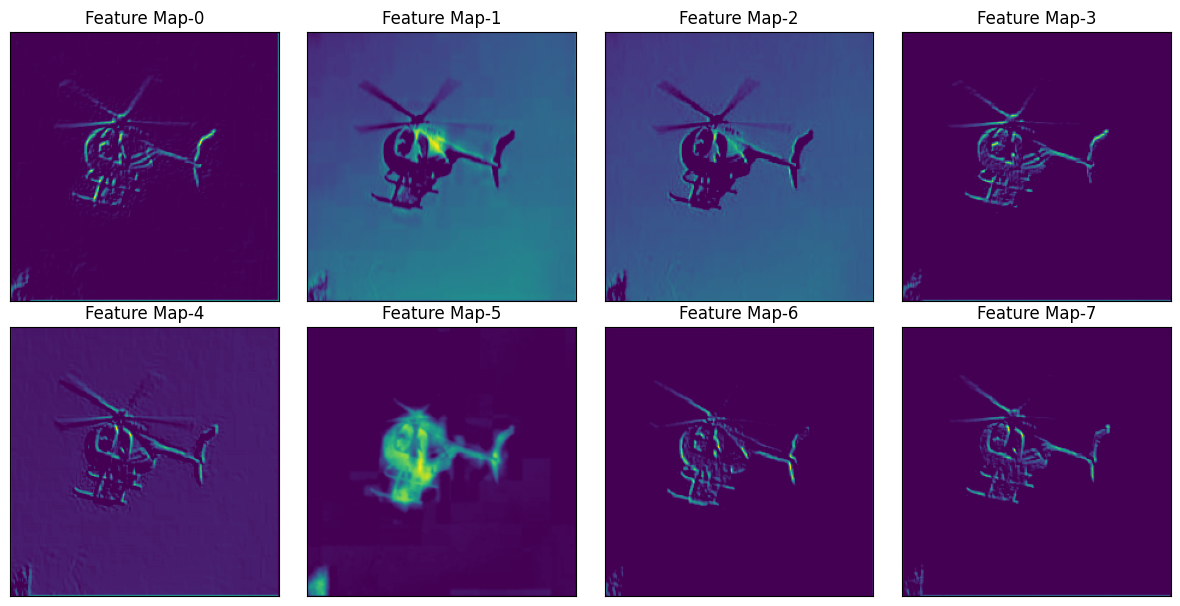

In [15]:
plt.figure(figsize=(15,15))
for i in range(8):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv1FM[50][ :, :, i])
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#for i in range(8):
        #plt.imshow(conv1FM[0][ :, :, i])
plt.show()

In [17]:
modelConv2 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block1_conv2').output)
conv2FM = modelConv2.predict(trainInp)
print(conv2FM.shape)

8/8 [==============================] - 3s 352ms/step
(250, 224, 224, 64)


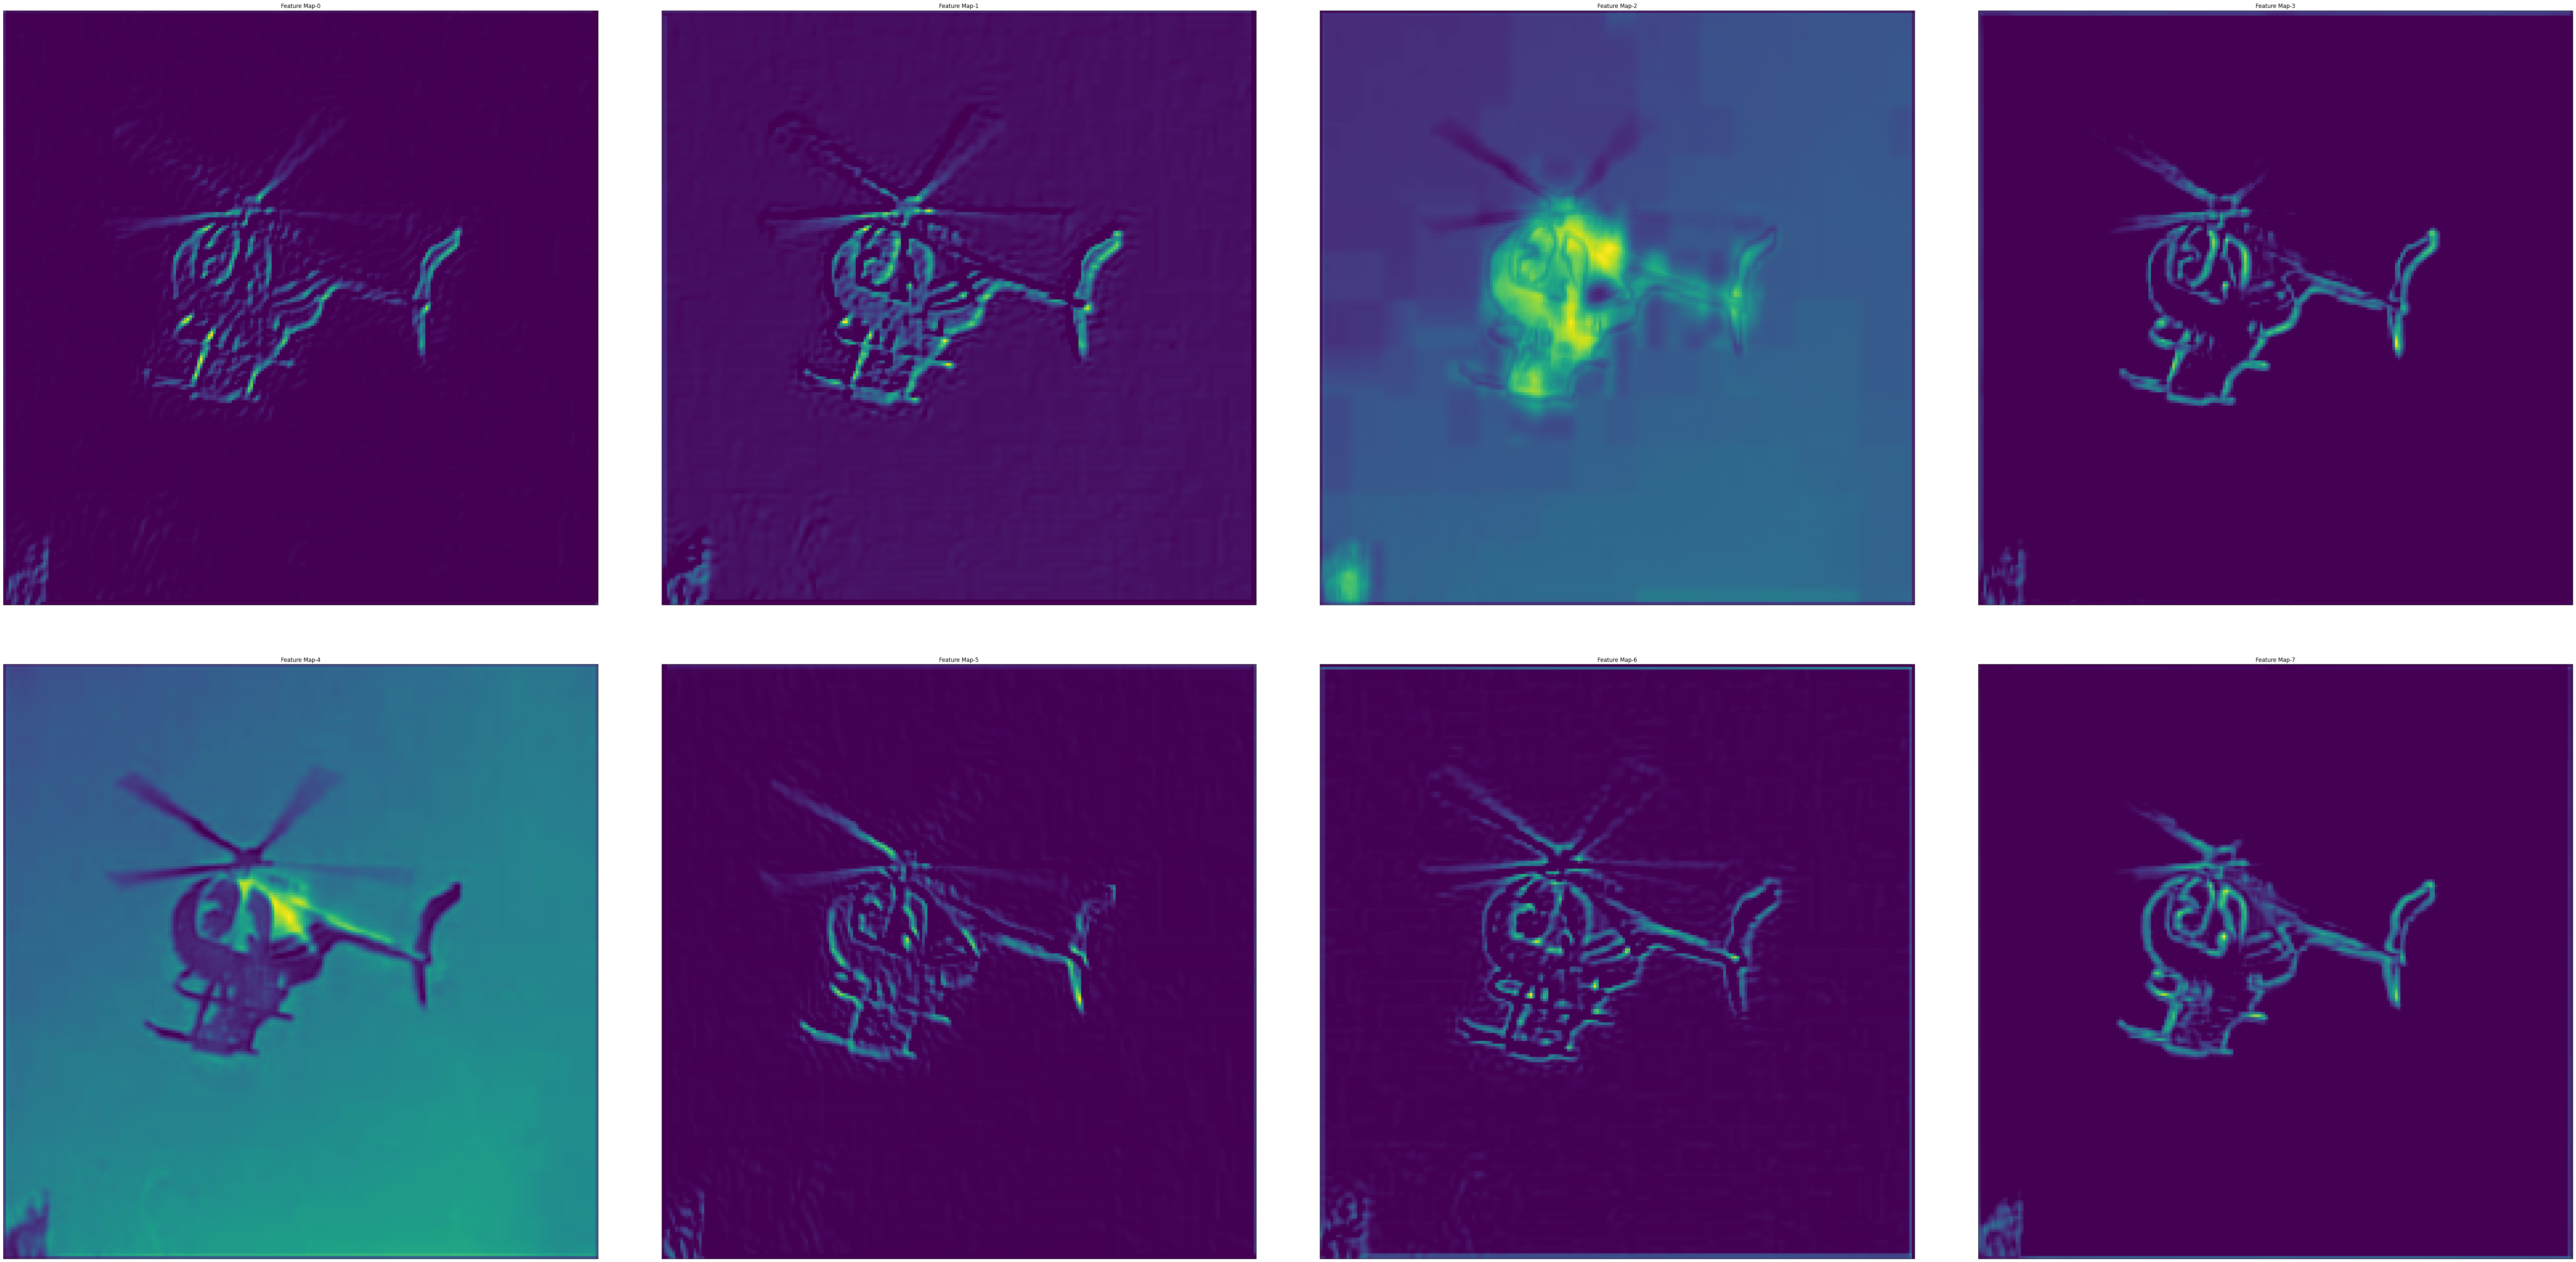

In [18]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv2FM[50][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
modelConv3 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block2_conv1').output)
conv3FM = modelConv3.predict(trainInp)
print(conv3FM.shape)

8/8 [==============================] - 4s 499ms/step
(250, 112, 112, 128)


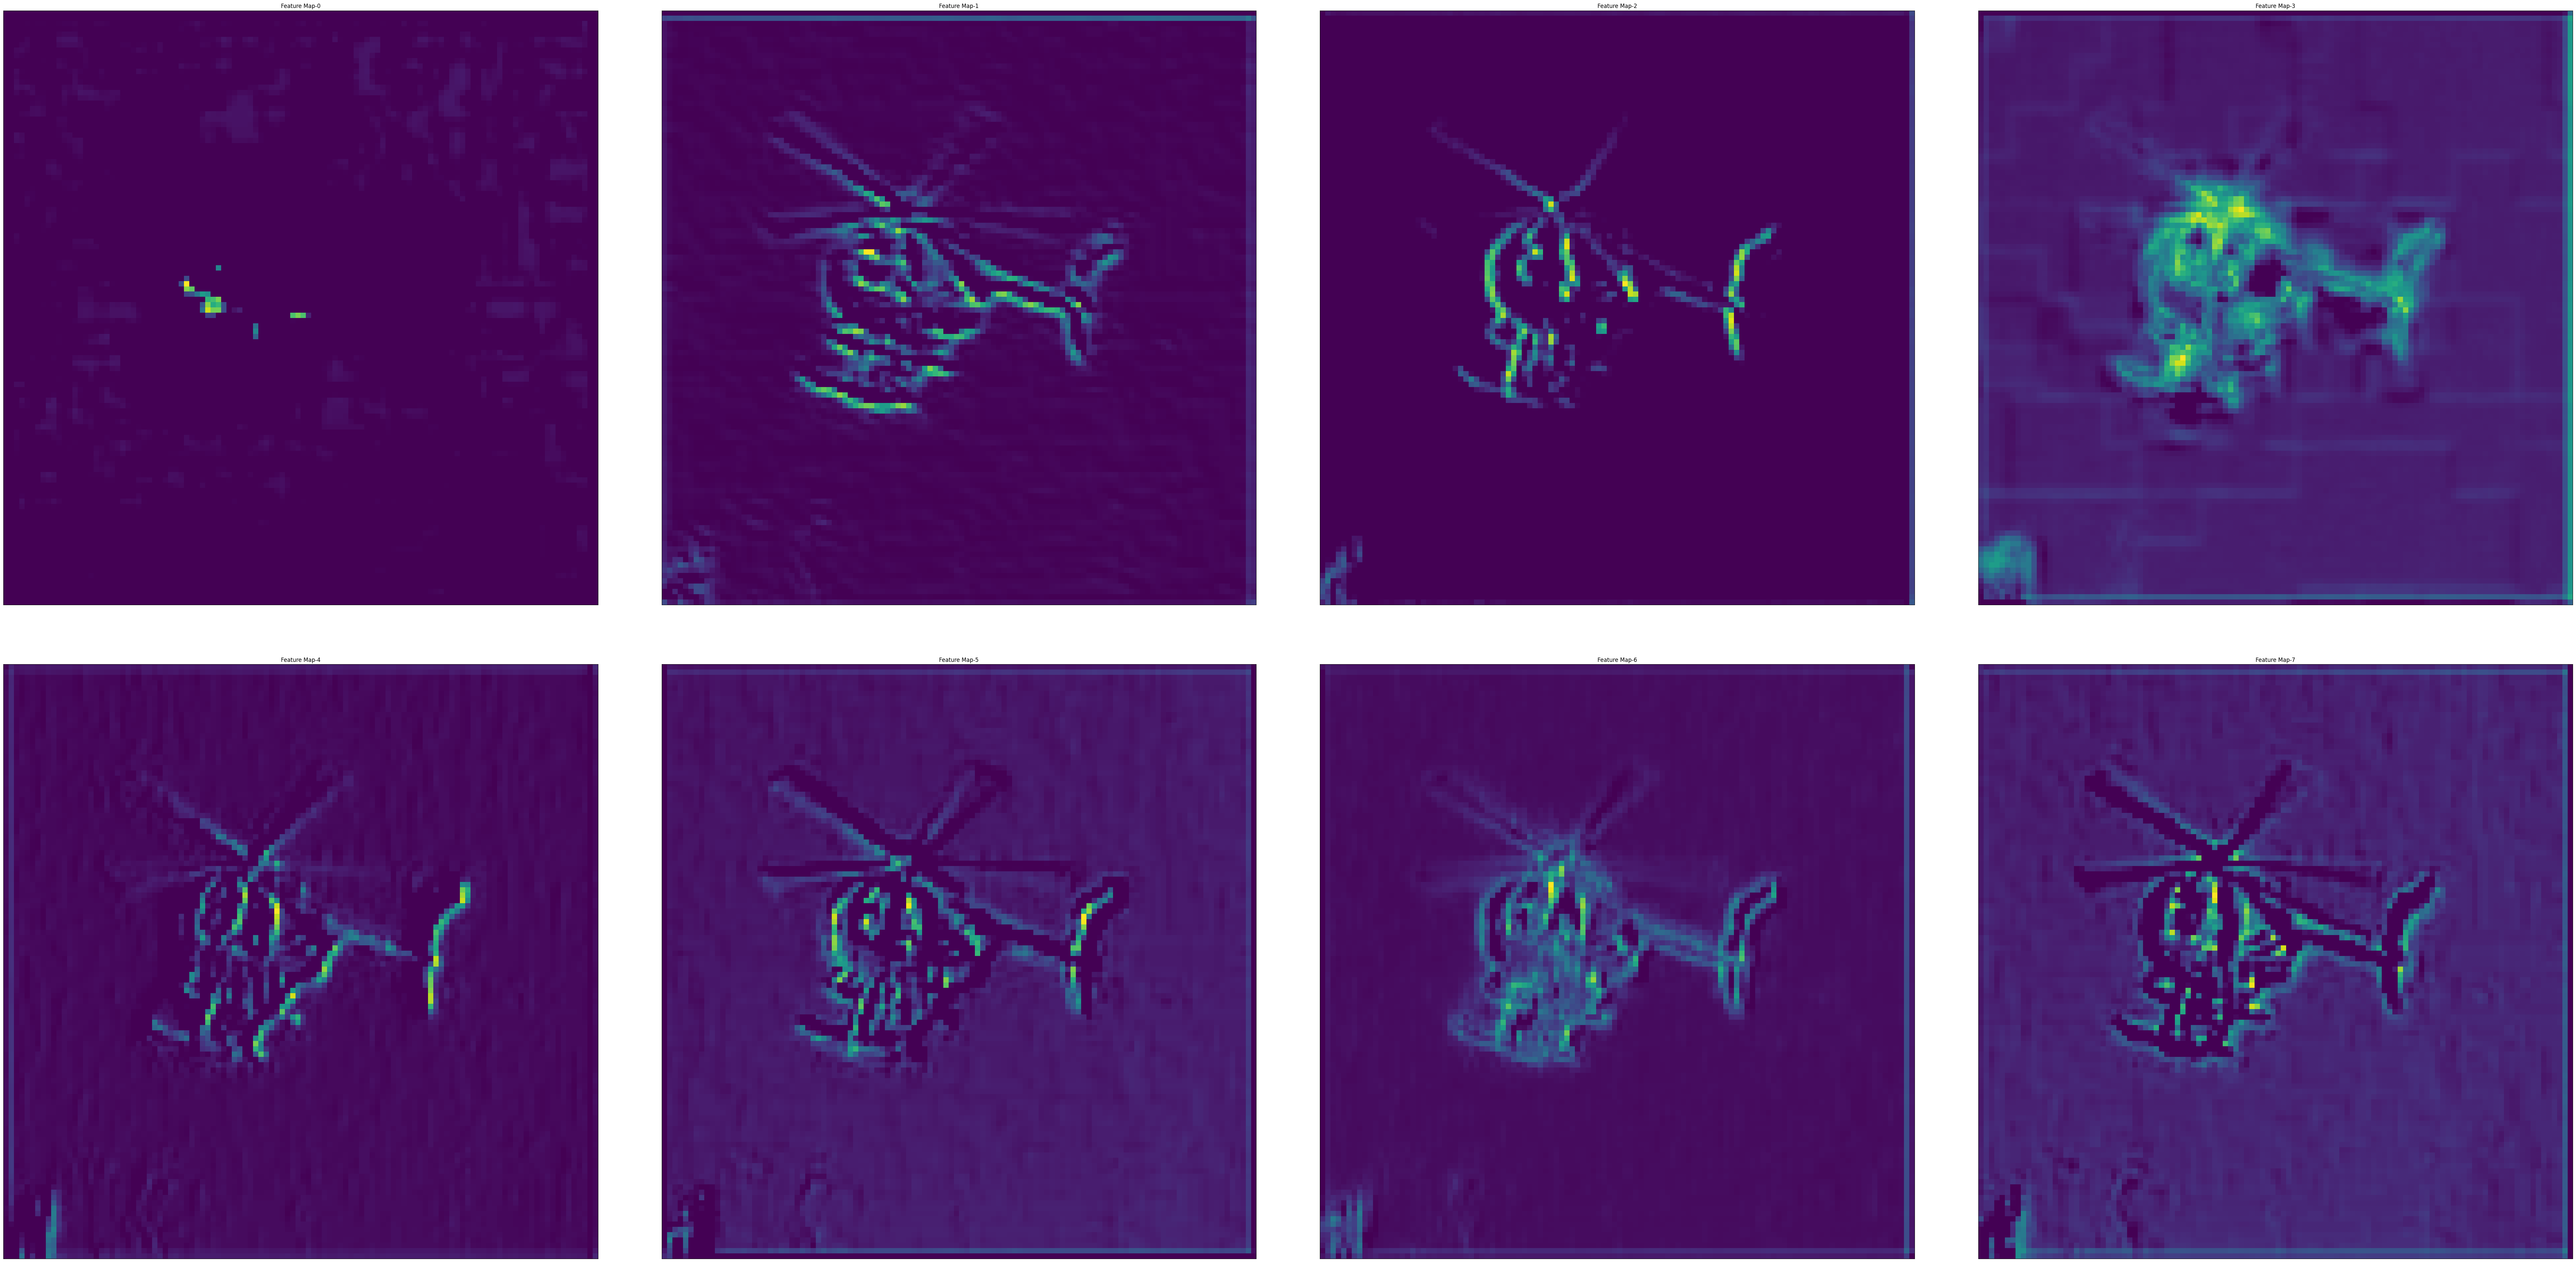

In [20]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv3FM[50][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
modelConv4 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block2_conv2').output)
conv4FM = modelConv4.predict(trainInp)
print(conv4FM.shape)

8/8 [==============================] - 6s 771ms/step
(250, 112, 112, 128)


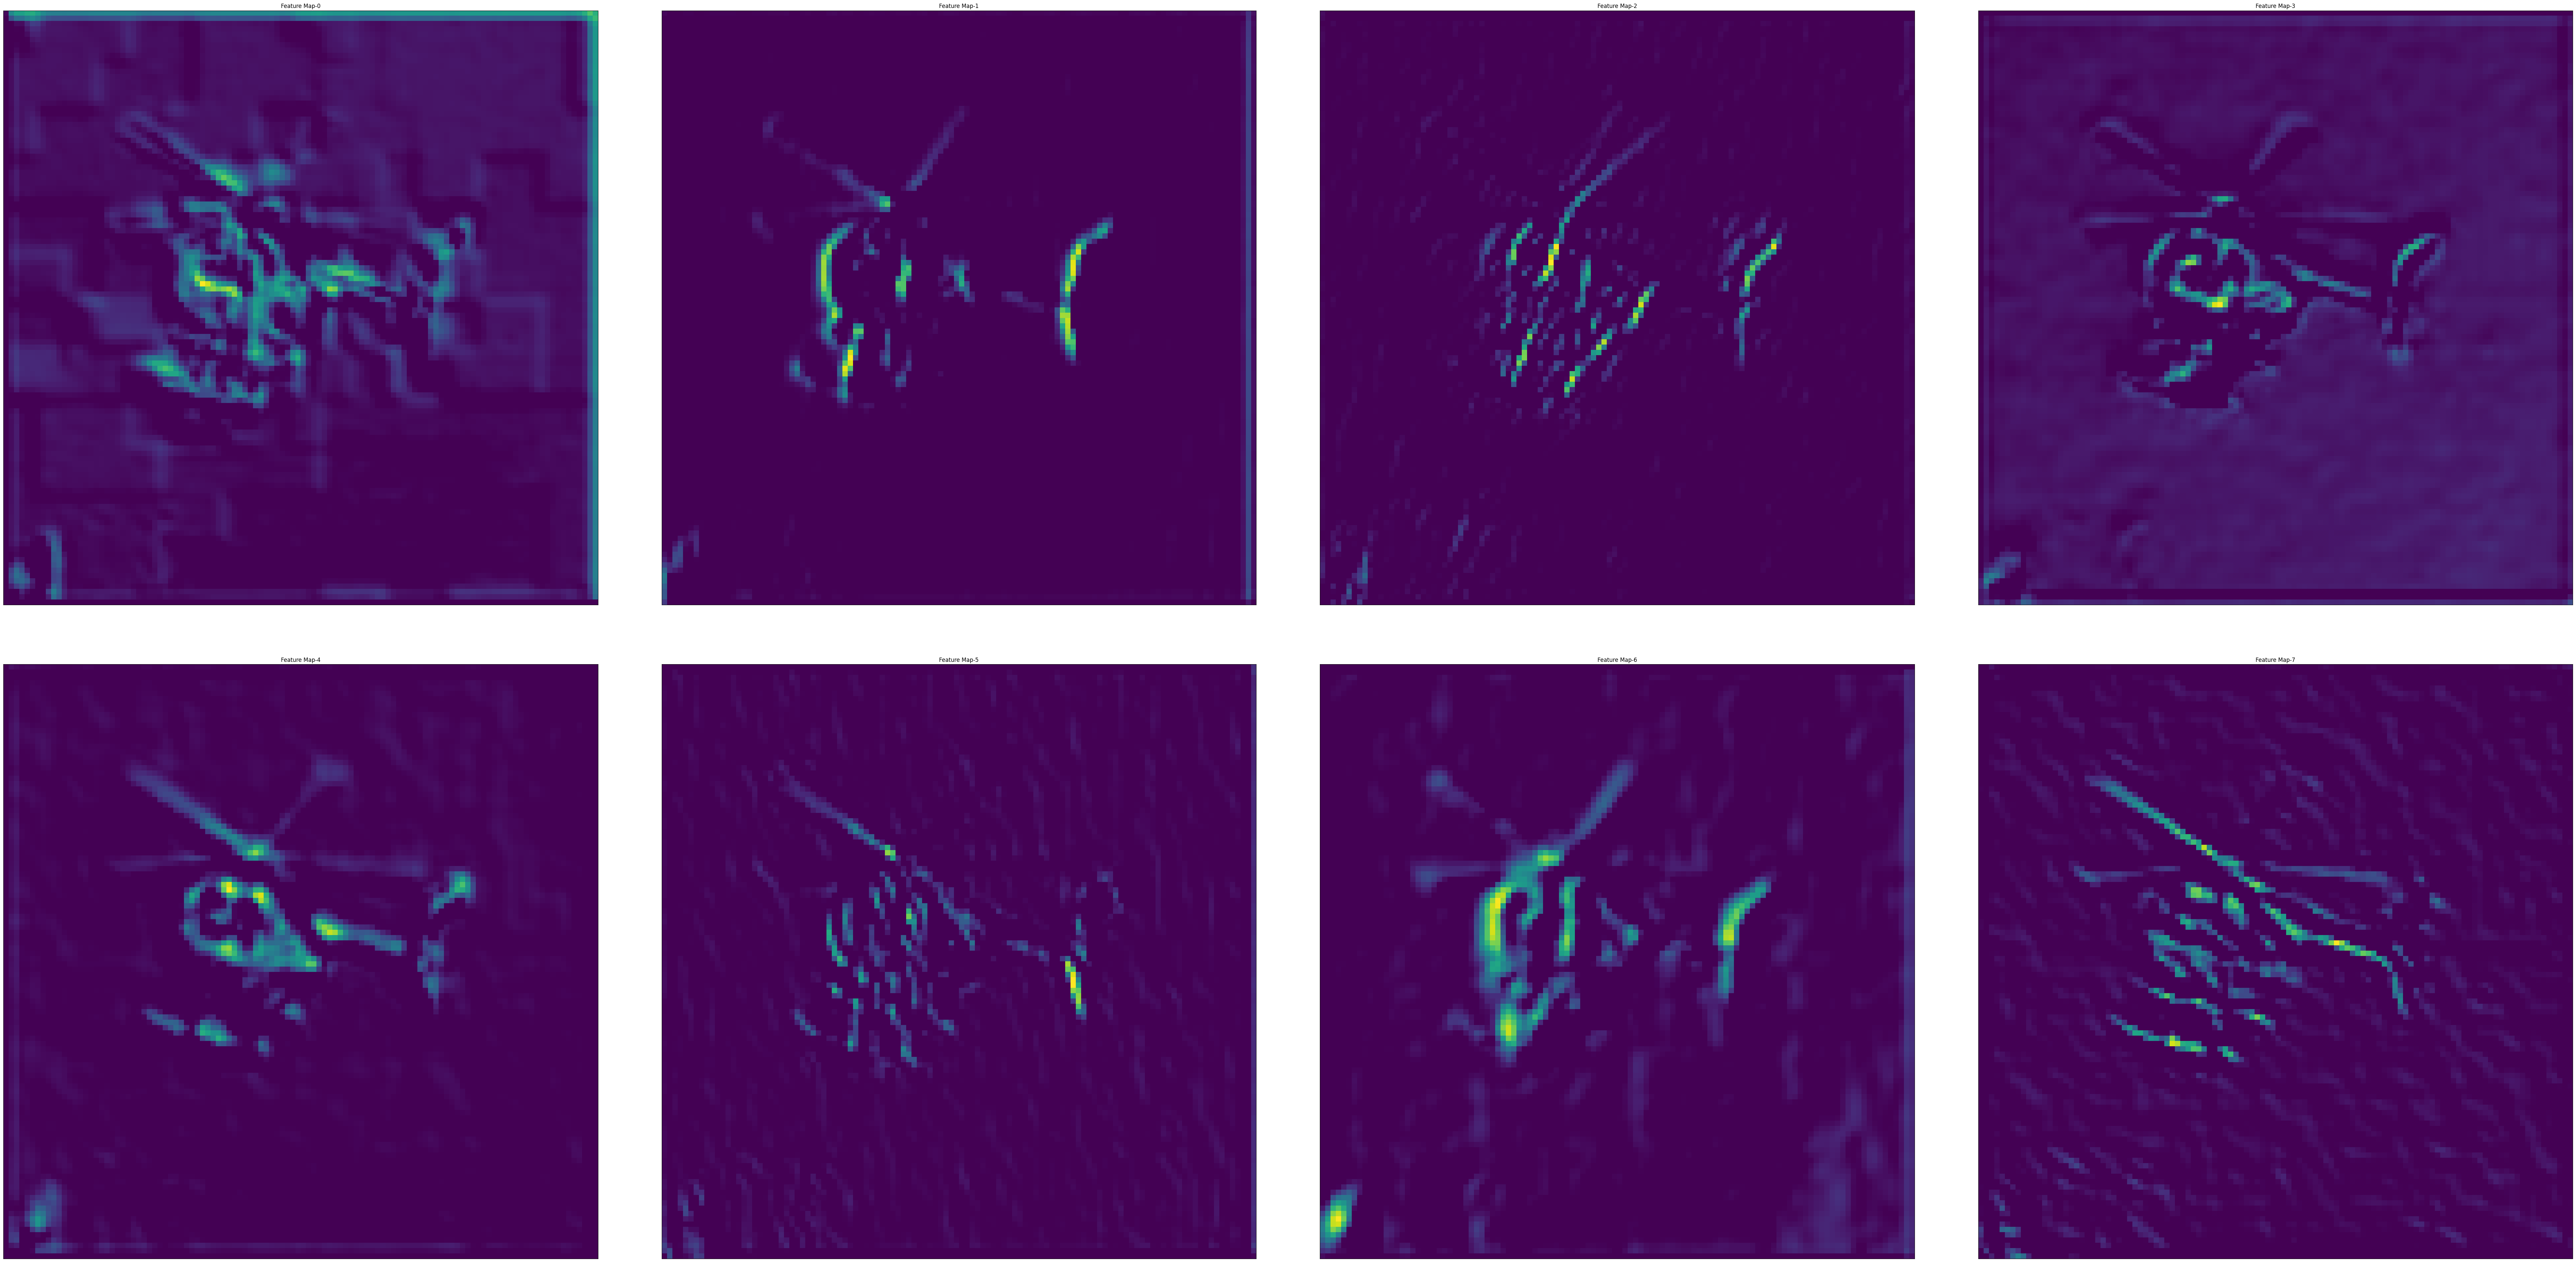

In [22]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv4FM[50][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
#pip install visualkeras


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import visualkeras
from PIL import ImageFont

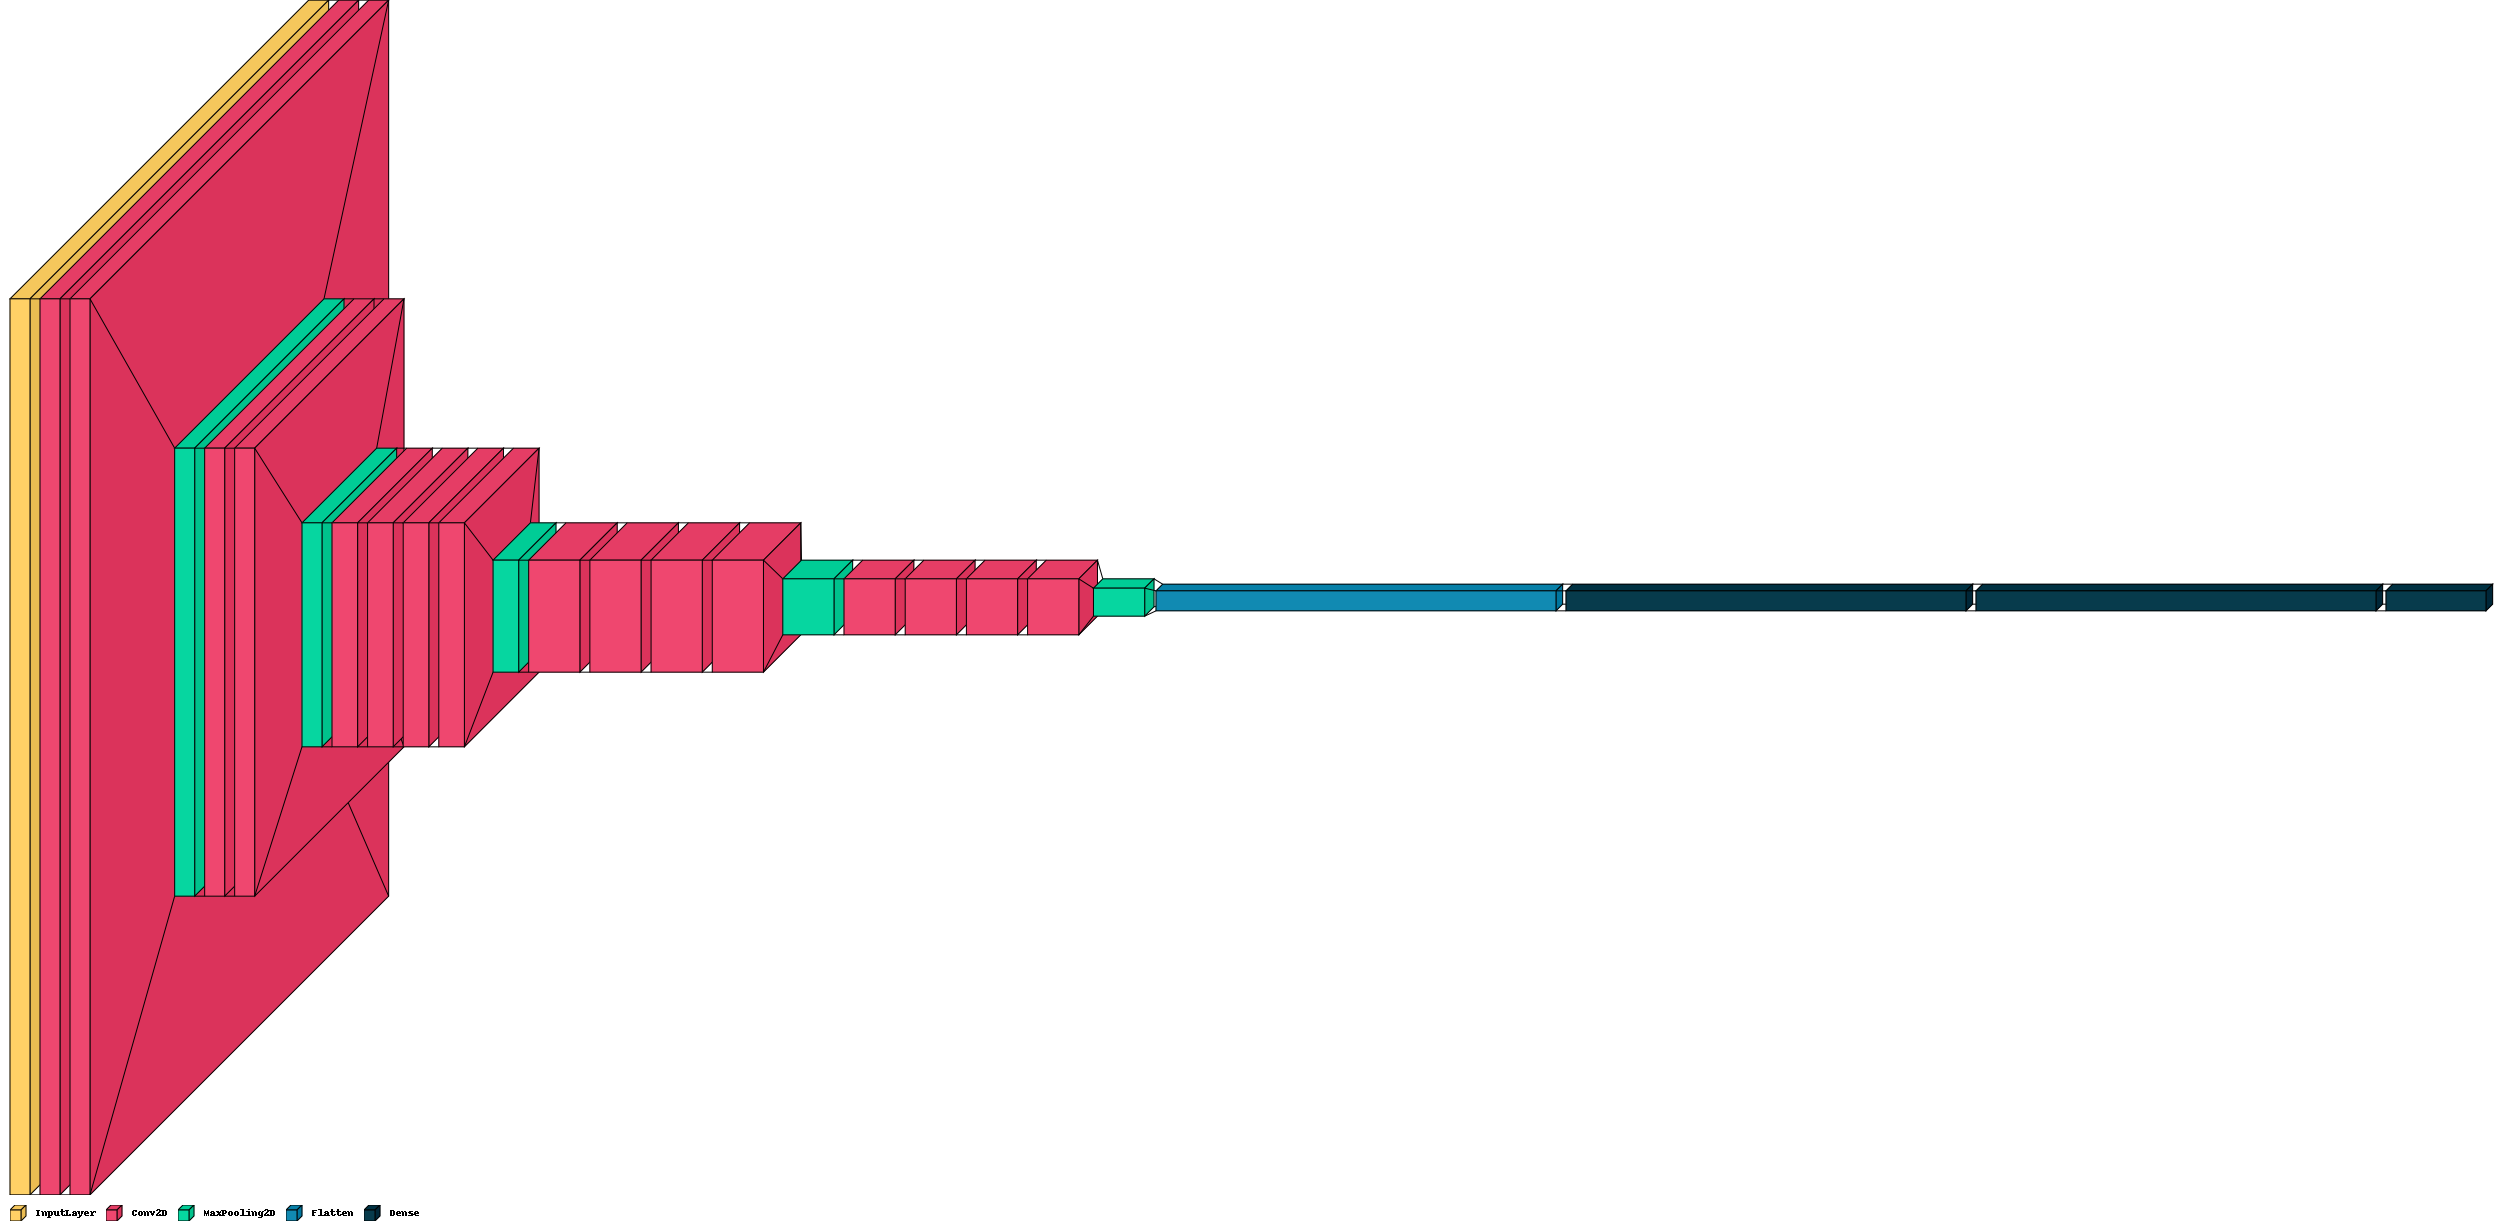

In [23]:
#font = ImageFont.truetype("arial", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(vgg19, legend=True)

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

In [60]:
def get_img_array(img, size):
    # `img` is a PIL image of size 299x299
    #img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [61]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(),grads

In [68]:
img=trainInp[50]

In [69]:
img.shape

(224, 224, 3)

In [70]:
# Prepare image
img_array = preprocess_input(get_img_array(img, size=img_size))
print(img_array.shape)
# Make model
#model = model_builder(weights="imagenet")

(1, 224, 224, 3)


In [71]:
last_conv_layer_name = "block5_conv4"

In [72]:
# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print(preds)
#print("Predicted:", decode_predictions(preds[100], top=1)[0])



1/1 [==============================] - 0s 144ms/step
[[-5.3789024  -5.99217    -2.0571625  -0.35441348 -4.303709  ]]


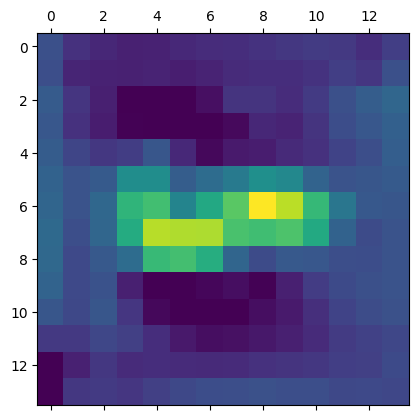

In [73]:
# Generate class activation heatmap
heatmap,grad = make_gradcam_heatmap(img_array, model, 'block5_conv4')

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [74]:
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

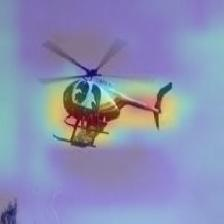

In [75]:
save_and_display_gradcam(img, heatmap)

In [58]:
preds.shape

(1, 1000)

In [84]:
layer_names = [layer.name for layer in model.layers]
layer_names

['input_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool',
 'flatten',
 'fc1',
 'fc2',
 'dense']

8/8 [==============================] - 35s 5s/step


/var/folders/rz/k79v6rz54_z4sdk6rxgw4lrc0000gn/T/ipykernel_4552/94089749.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(display_grid, aspect='auto')
/var/folders/rz/k79v6rz54_z4sdk6rxgw4lrc0000gn/T/ipykernel_4552/94089749.py:28: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/var/folders/rz/k79v6rz54_z4sdk6rxgw4lrc0000gn/T/ipykernel_4552/94089749.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(scale * display_grid.shape[1],


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[1, 2] += ty


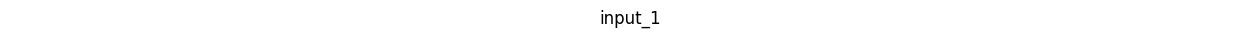

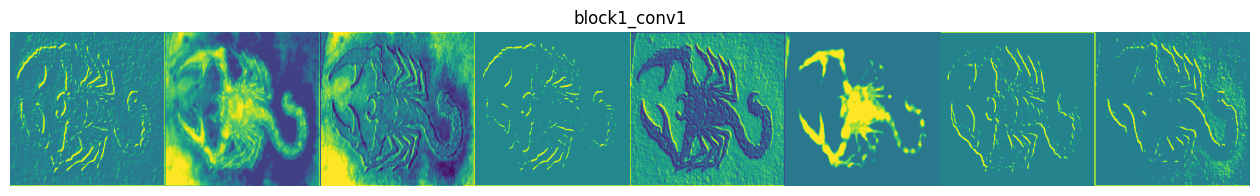

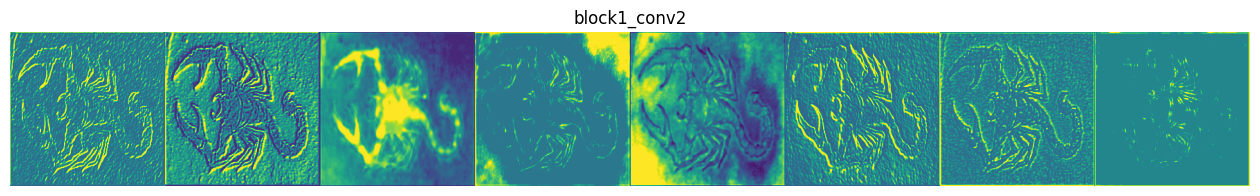

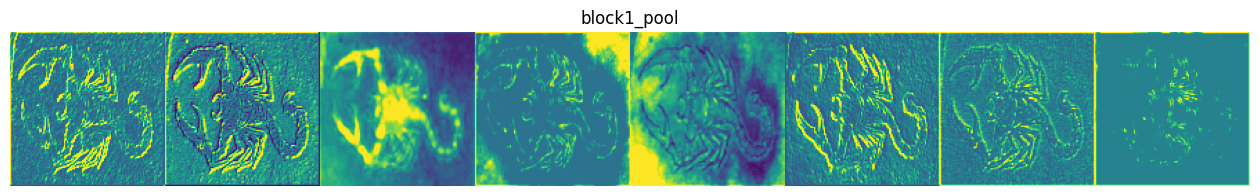

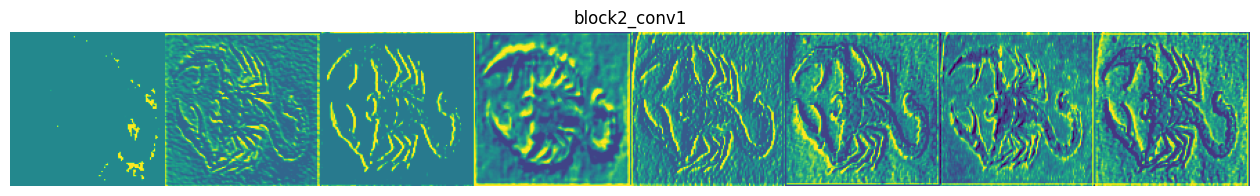

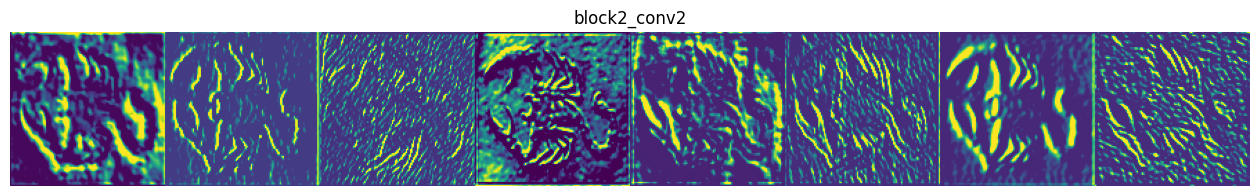

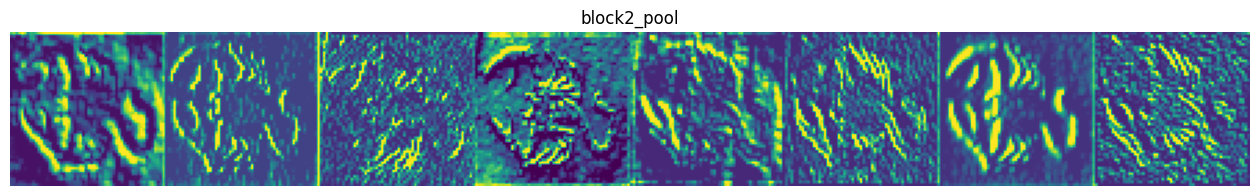

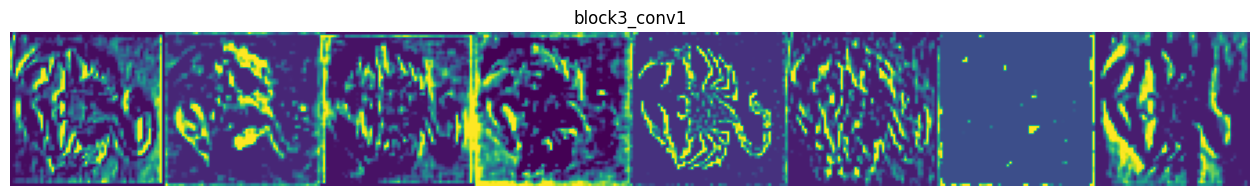

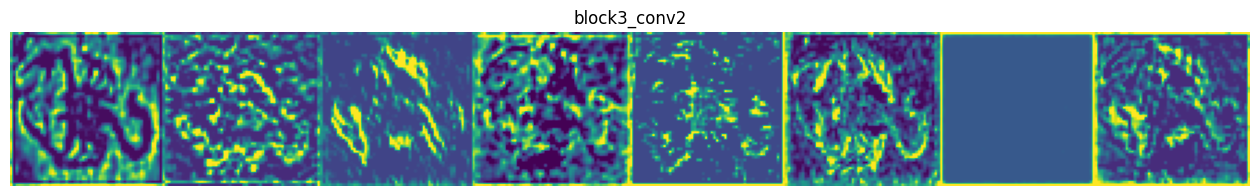

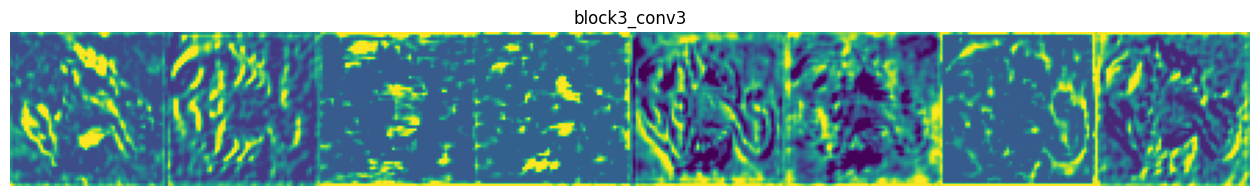

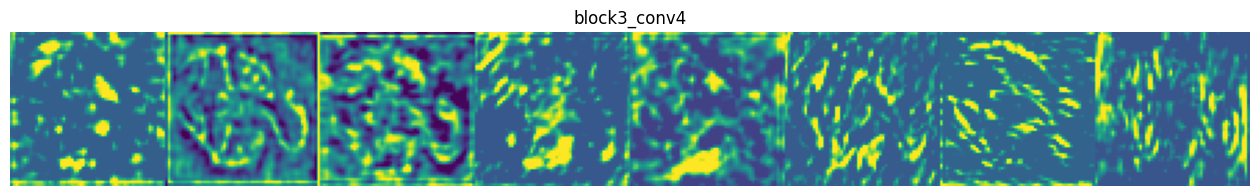

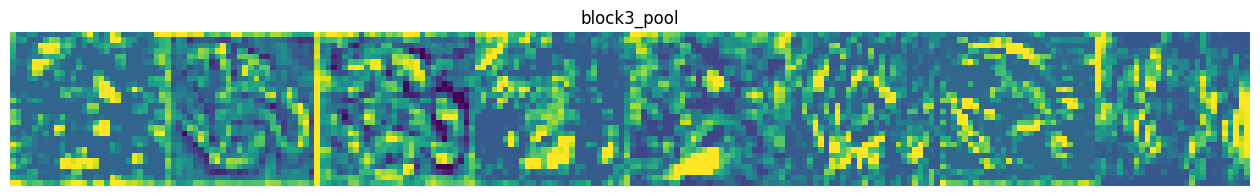

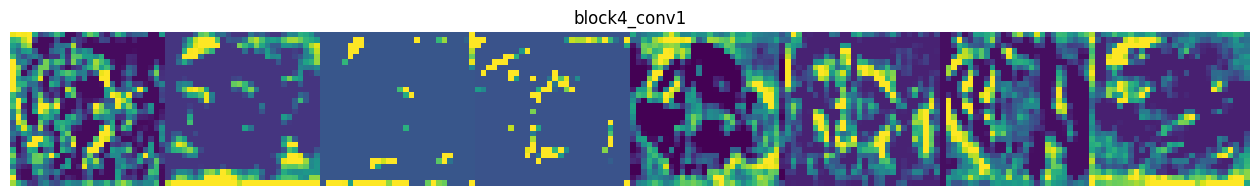

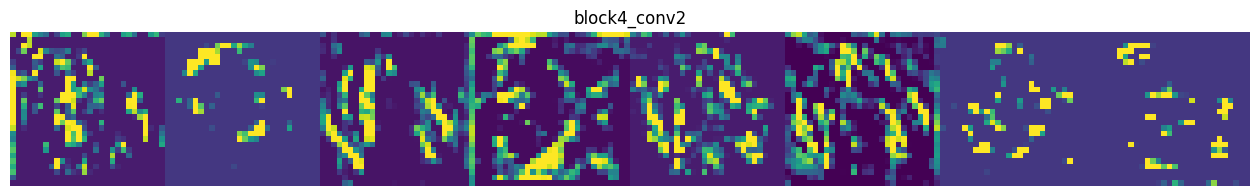

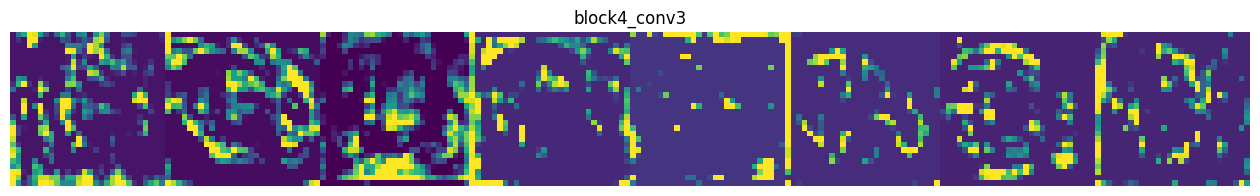

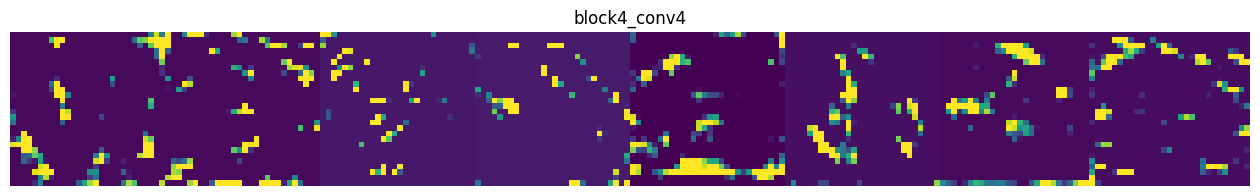

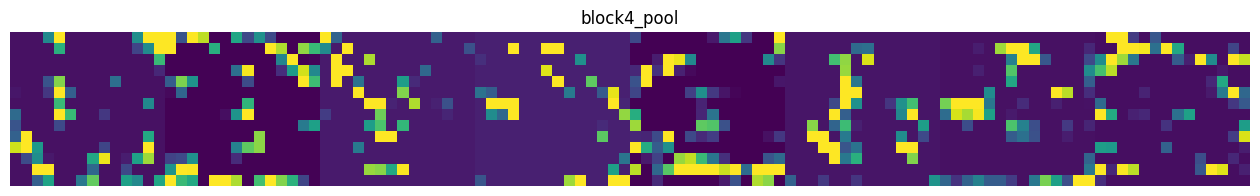

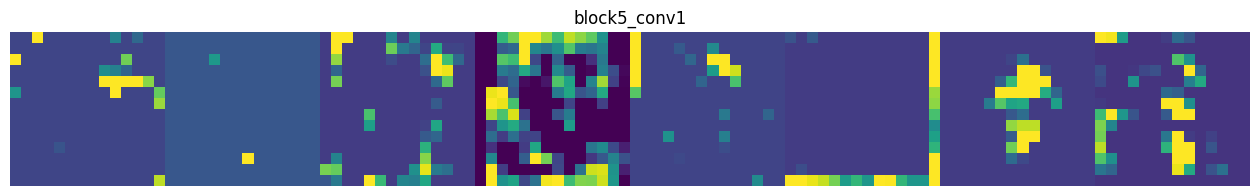

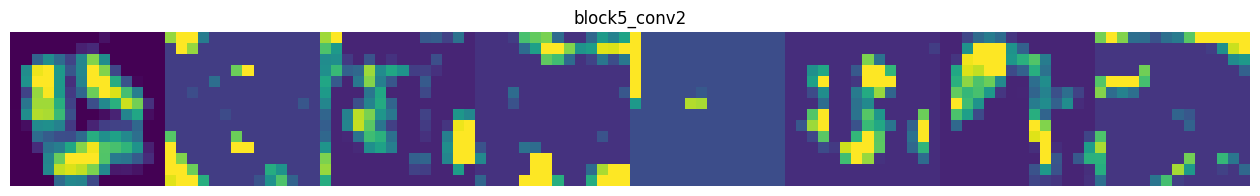

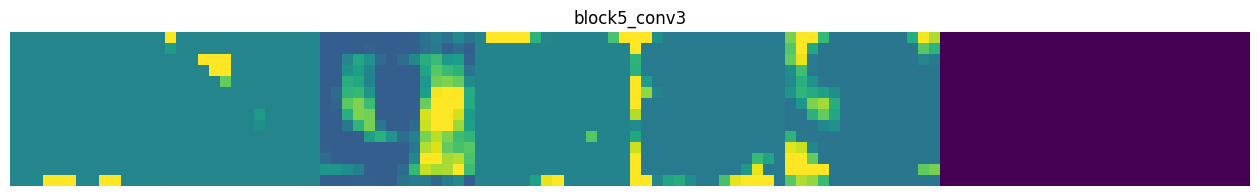

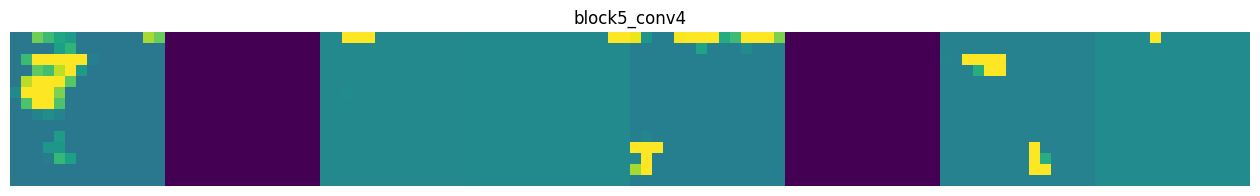

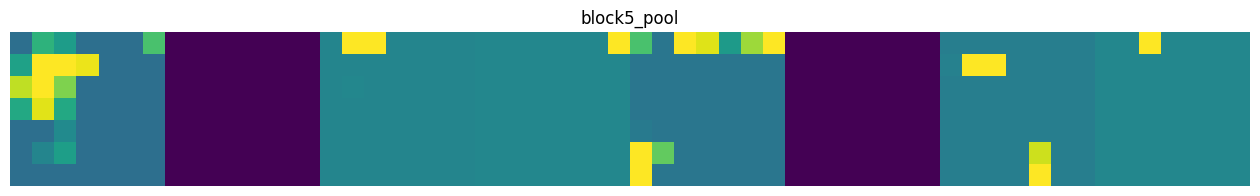

In [90]:
layer_outputs = [layer.output for layer in model.layers if layer.name in layer_names]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(trainInp)

images_per_row = 8
max_images = 8
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    n_features = min(n_features, max_images)

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.axis('off')
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')
    
plt.show()

<Figure size 1800x1800 with 0 Axes>

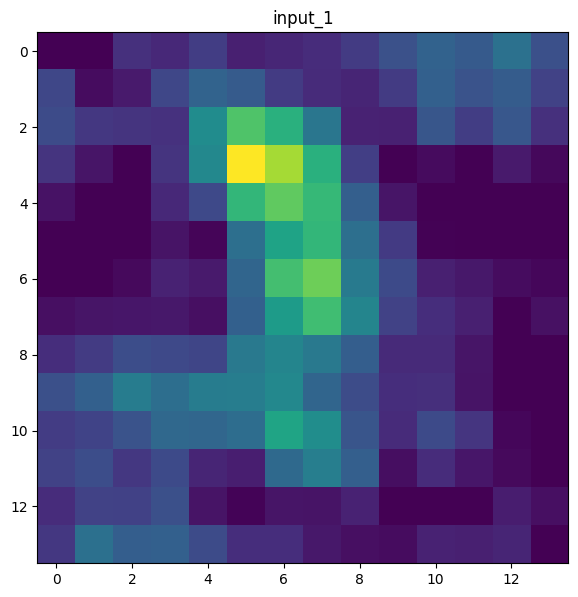

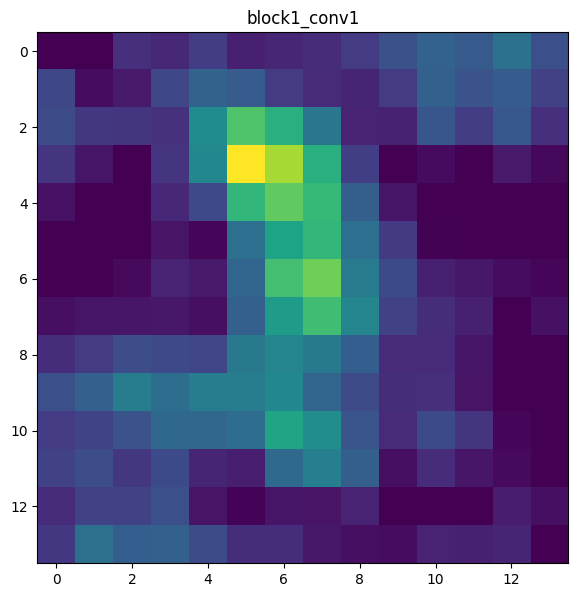

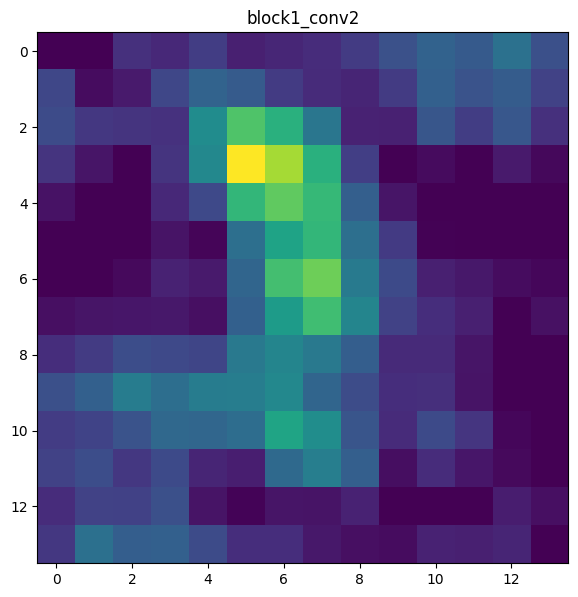

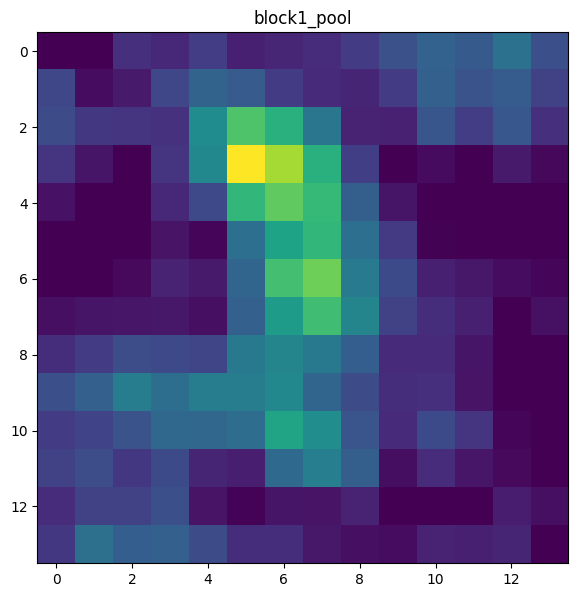

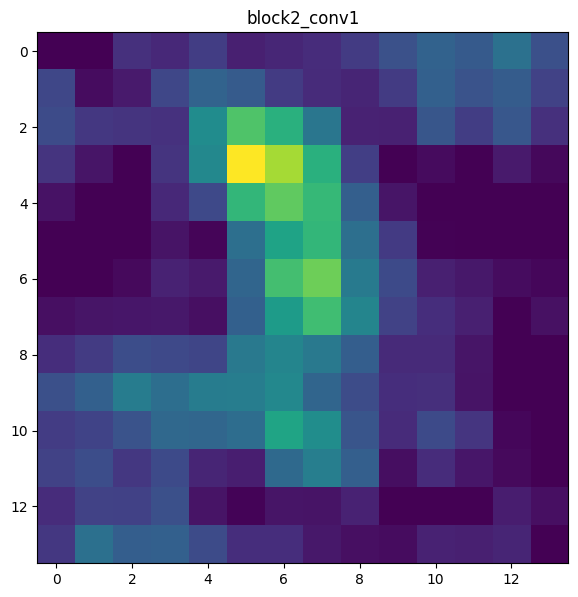

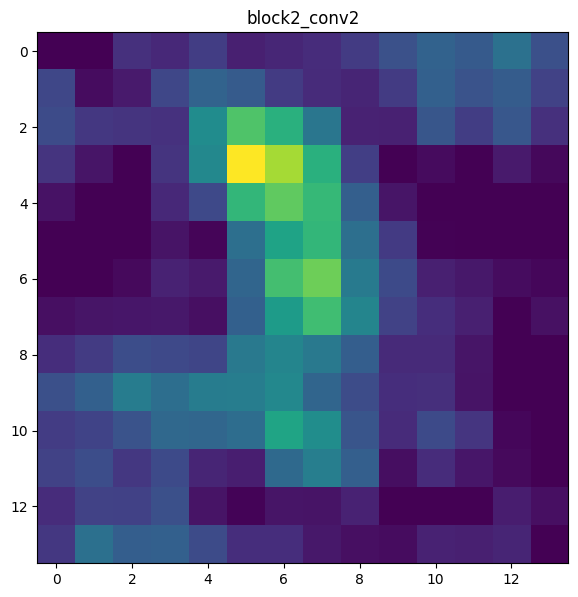

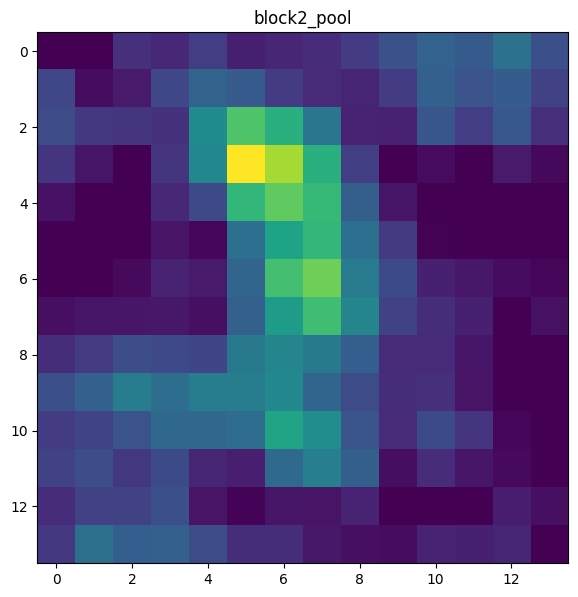

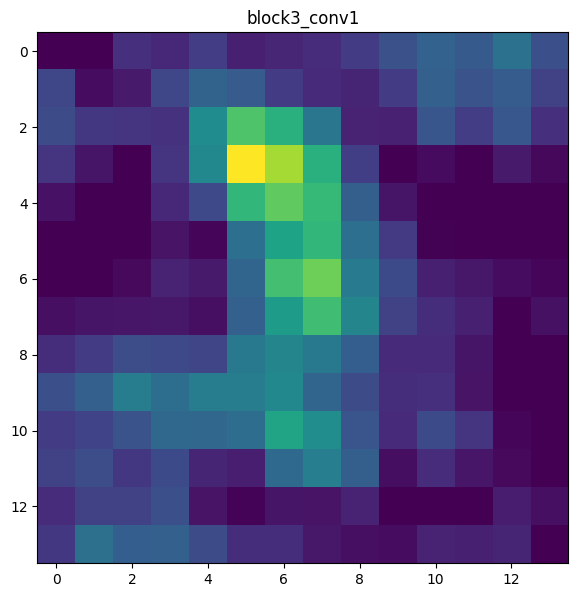

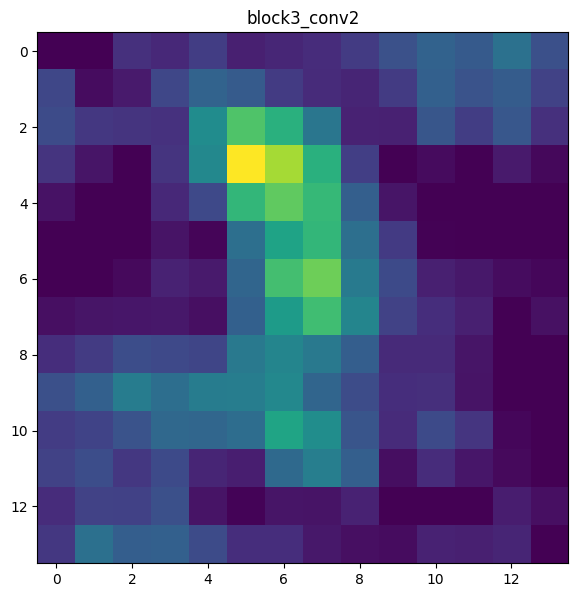

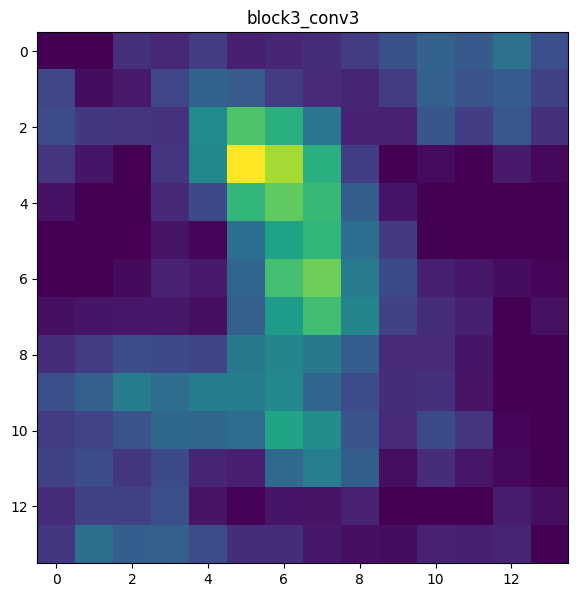

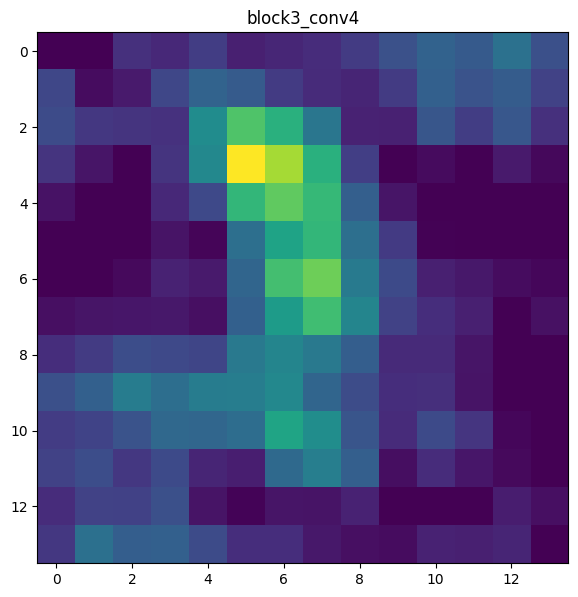

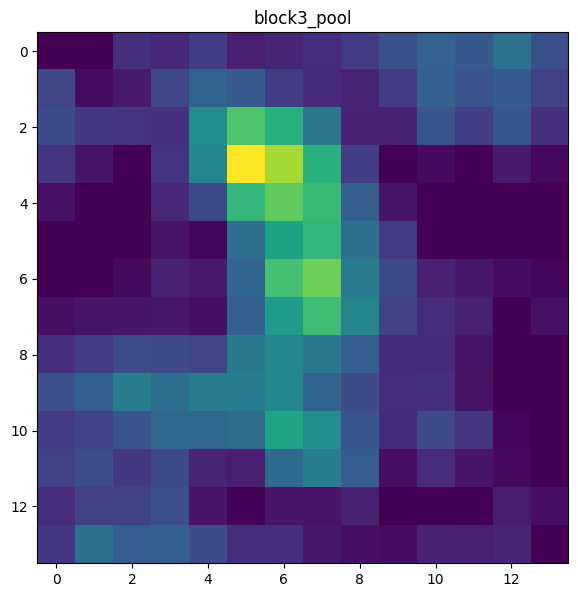

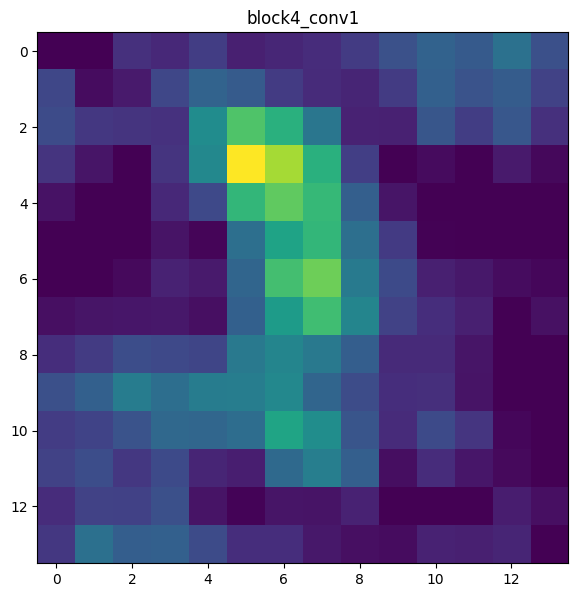

In [88]:
plt.figure(figsize=(18, 18))
for i in range(13):
    plt.figure(figsize=(40,40))
    plt.subplot(5, 3, i+1)
    img_heatmap = np.maximum(heatmap[i], 0)
    img_heatmap /= np.max(heatmap)
    plt.imshow(heatmap)
    plt.title(layer_names[i])
    plt.show()

In [69]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer('block5_conv4').output, model.output]
    )
    
    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, 'block5_conv4')
    
    #print(grads)
    
    #print(grad_model.shape)
    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(),grads,pooled_grads

In [33]:
trainInp[0].shape

(224, 224, 3)

In [73]:
preds.shape

(250, 5)

In [74]:
trainInp.shape

(250, 224, 224, 3)

In [98]:
heatmap,grads=make_gradcam_heatmap(trainInp, model, 'block5_conv4')

In [105]:
len(heatmap)

2

In [106]:
grads.shape

TensorShape([250, 14, 14, 512])

In [107]:
grads

<tf.Tensor: shape=(250, 14, 14, 512), dtype=float32, numpy=
array([[[[ 3.69519432e-04,  1.04843732e-03,  3.76580603e-04, ...,
           4.64009383e-04,  1.39979500e-04, -2.20692717e-04],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 7.12054316e-07,  3.16669903e-04,  5.67030766e-05, ...,
           9.85376100e-05,  3.04548506e-04, -7.08049396e-04],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  2.39833098e-04,  0.00000000e+00],
         [ 9.18713515e-04,  3.46124114e-04,  3.68195673e-04, ...,
           1.42025383e-04,  0.00000000e+00, -6.36865298e-05],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00, -2.73570477e-04,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  

In [125]:
plt.figure(figsize=(100,100))
for i in range(250):
    ax=plt.subplot(4,4,i)
    plt.title('Feature Map-'+str(i))
    plt.imshow(grads[0][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: num must be an integer with 1 <= num <= 16, not 0

<Figure size 10000x10000 with 0 Axes>

In [ ]:
# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = vgg19.predict(trainInp)
print(preds)
#print("Predicted:", decode_predictions(preds[100], top=1)[0])

# Generate class activation heatmap
heatmap,grad,pooledGrads = make_gradcam_heatmap(trainInp, model, 'block5_conv4')

# Display heatmap
plt.matshow(heatmap)
plt.show()

8/8 [==============================] - 21s 3s/step
[[2.0843812e-05 4.8182017e-05 1.1013937e-04 ... 1.5523168e-04
  4.4817134e-05 3.7226384e-03]
 [1.9974902e-08 3.9472873e-08 2.7678713e-08 ... 4.4890324e-08
  4.7025077e-07 1.6001362e-06]
 [5.7139737e-10 6.9053492e-08 6.8103259e-07 ... 5.6912981e-09
  4.3974438e-08 1.8495030e-07]
 ...
 [2.1949838e-06 1.4535705e-05 3.1015832e-05 ... 2.2340389e-06
  5.0785127e-07 8.0821446e-05]
 [7.4018789e-07 8.0816957e-05 6.5200834e-06 ... 2.6622050e-05
  3.1086818e-06 1.8015280e-04]
 [3.9731653e-08 1.8481325e-06 2.9013643e-07 ... 2.2124217e-07
  6.4279434e-06 1.8727928e-06]]


In [ ]:
# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = vgg19.predict(trainInp)
print(preds)
#print("Predicted:", decode_predictions(preds[100], top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(trainInp, model, 'block5_conv4')

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [94]:
preds.shape

(250, 1000)

In [70]:
img=trainInp[0]

In [79]:
def save_and_display_gradcam(img, heatmap, cam, alpha=0.4):
    # Load the original image
    #img = keras.preprocessing.image.load_img(img_path)
    #img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img, heatmap)

TypeError: save_and_display_gradcam() missing 1 required positional argument: 'cam'

In [47]:
filters, biases = model.get_layer('block1_conv1').get_weights()

(3, 3, 3, 64)


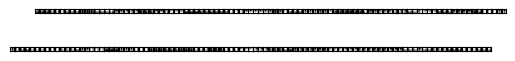

In [68]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [ ]:
for i in range(trainInp.shape[0]):
    plt.imshow(trainInp[i])
    plt.show()

In [46]:
print(preds.shape)

(250, 5)


vgg19=tf.keras.applications.vgg19.VGG19(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
vgg19.summary()

vgg=VGG19(include_top=False)

vgg=tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False) 
#Training with Imagenet weights
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(folders), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
